In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import statsmodels.api as sm

In [ ]:
#10A
np.random.seed(4)
X = np.random.normal(size = (1000, 20))
irreducible_error = np.random.normal(0, 1, size = (1000, 1))

betas_nonzero = np.random.randint(-10,10,10)
betas_zero = np.zeros(shape = (10))
betas = np.concatenate([betas_zero, betas_nonzero])
np.random.shuffle(betas)
betas = np.expand_dims(betas,axis = 1)
#print(f'The random betas generated were: {betas}')
y = np.dot(X, betas) + irreducible_error
df = pd.DataFrame(X, columns = [f"X{i}" for i in range(1, X.shape[1] + 1)])
df


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,0.050562,0.499951,-0.995909,0.693599,-0.418302,-1.584577,-0.647707,0.598575,0.332250,-1.147477,0.618670,-0.087987,0.425072,0.332253,-1.156816,0.350997,-0.606887,1.546979,0.723342,0.046136
1,-0.982992,0.054433,0.159893,-1.208948,2.223360,0.394295,1.692358,-1.112812,1.635748,-1.360966,-0.651226,0.542451,0.048006,-2.358074,-1.105584,0.837836,2.087871,0.914841,-0.276203,0.796512
2,-1.143799,0.509920,-1.347460,-0.009360,-0.130705,0.802087,-0.302964,1.202003,-0.196745,0.836529,0.786602,-1.840876,0.037547,0.035928,-0.778740,0.179411,-1.455534,0.556185,0.509779,0.300446
3,2.476584,0.352343,0.067471,-0.732265,0.297141,-0.961777,1.271819,-0.647645,0.158470,1.990083,1.164188,0.242660,1.379920,-0.054559,0.795234,0.019090,-0.905438,0.430271,0.934650,-0.346102
4,-1.097122,-0.528196,-2.379775,-0.607684,-1.075290,2.022405,-0.564875,-1.542929,0.870842,-0.175211,0.048603,0.188646,0.209313,-0.374445,0.954699,0.523248,-0.495819,-0.171465,-0.944369,0.280865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.801160,-0.441882,-0.807041,0.284186,0.422697,-0.084055,1.166574,-0.238942,-1.235690,0.163827,-1.890594,1.390405,1.566315,0.308454,-1.323635,-0.606122,0.663416,1.435274,-0.041186,-0.609367
996,0.385786,-1.389977,0.430569,-0.143835,-0.097673,-0.011281,-0.277214,-2.258331,0.531191,1.445277,-0.597257,0.594140,-1.089155,0.477533,-0.088159,-1.151116,-0.156641,-1.535888,0.101480,-2.761984
997,-1.468950,-0.081141,0.876354,-0.444549,-0.578501,1.808540,0.826443,-0.199429,0.732979,-0.375453,1.750648,1.334220,0.130610,1.113853,1.528460,0.783728,-0.723193,0.324756,-0.151239,-0.881074
998,-1.693536,0.736224,0.399378,1.951197,-0.070067,-0.123321,0.254594,-0.279181,-0.926573,1.578770,1.297213,0.140081,-1.361602,0.505004,-0.199788,1.316908,0.747242,1.145555,-1.523795,0.326318


In [ ]:
#10.B
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 2025)

#Another form to do it

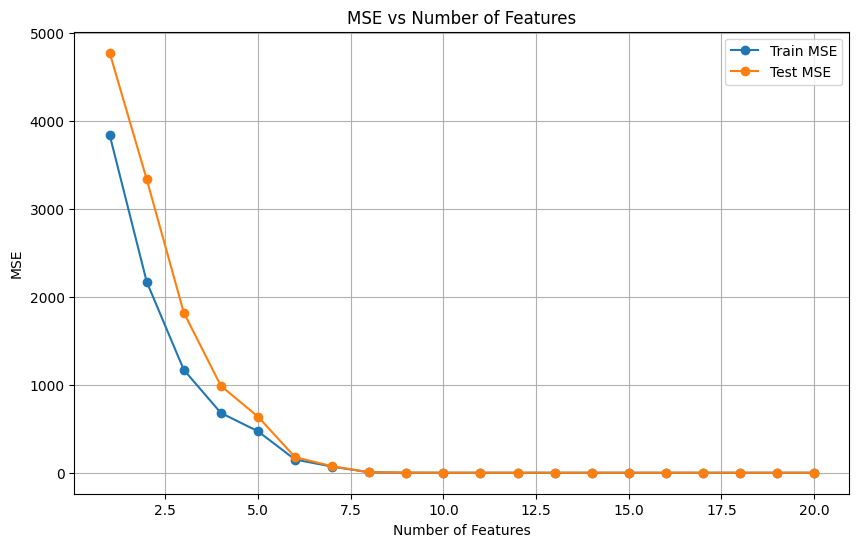

In [ ]:
score_mse_train = []
score_mse_test = []
for n in range(1, X.shape[1] + 1):

    sfs = SequentialFeatureSelector(
        LinearRegression(), k_features=n, forward=True, cv=10, scoring='neg_mean_squared_error', n_jobs=-1
    )
    sfs.fit(X_train, y_train)

    features_selected = list(sfs.k_feature_idx_)
    X_train_selected = X_train[:, features_selected]
    X_test_selected = X_test[:, features_selected]


    lr = LinearRegression()
    lr.fit(X_train_selected, y_train)

    y_train_pred = lr.predict(X_train_selected)
    y_test_pred = lr.predict(X_test_selected)


    score_mse_train.append(mean_squared_error(y_train, y_train_pred))
    score_mse_test.append(mean_squared_error(y_test, y_test_pred))


plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), score_mse_train, label="Train MSE", marker="o")
plt.plot(range(1, X.shape[1] + 1), score_mse_test, label="Test MSE", marker="o")
plt.xlabel("Number of Features")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.title("MSE vs Number of Features")
plt.show()

#10.C

In [ ]:
#10.c
lr = LinearRegression(fit_intercept = True)
sfs = SequentialFeatureSelector(lr, k_features = 'best', forward = True, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)
model = sfs.fit(X_train, y_train)

df_results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df_results


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(19,)","[-129.09886342558738, -443.20978321783923, -30...",-257.113966,"(19,)",68.325342,91.994278,30.664759
2,"(6, 19)","[-158.90847596695173, -440.1027269772106, -191...",-174.082039,"(6, 19)",72.742388,97.941456,32.647152
3,"(6, 13, 19)","[-200.2610529081973, -252.66019985325647, -114...",-131.64375,"(6, 13, 19)",40.703764,54.804166,18.268055
4,"(4, 6, 13, 19)","[-101.17747457552385, -119.24254547858179, -88...",-73.489109,"(4, 6, 13, 19)",23.333987,31.417234,10.472411
5,"(4, 6, 7, 13, 19)","[-59.34205046263262, -50.31393355555623, -16.9...",-34.913721,"(4, 6, 7, 13, 19)",11.00222,14.813556,4.937852
6,"(0, 4, 6, 7, 13, 19)","[-23.108748841825808, -39.462466310757144, -15...",-22.941956,"(0, 4, 6, 7, 13, 19)",7.222858,9.724966,3.241655
7,"(0, 4, 6, 7, 12, 13, 19)","[-15.78392893529183, -17.06639879299148, -6.86...",-10.546194,"(0, 4, 6, 7, 12, 13, 19)",2.613993,3.519519,1.173173
8,"(0, 4, 6, 7, 12, 13, 14, 19)","[-7.110522123067867, -5.5163874169034575, -2.9...",-5.094017,"(0, 4, 6, 7, 12, 13, 14, 19)",1.37285,1.848426,0.616142
9,"(0, 4, 6, 7, 12, 13, 14, 15, 19)","[-2.1560934740105617, -1.0543939153675952, -3....",-1.98543,"(0, 4, 6, 7, 12, 13, 14, 15, 19)",0.607492,0.817936,0.272645
10,"(0, 4, 6, 7, 10, 12, 13, 14, 15, 19)","[-1.2827530880370372, -0.7840379682650391, -1....",-1.086009,"(0, 4, 6, 7, 10, 12, 13, 14, 15, 19)",0.284566,0.383145,0.127715


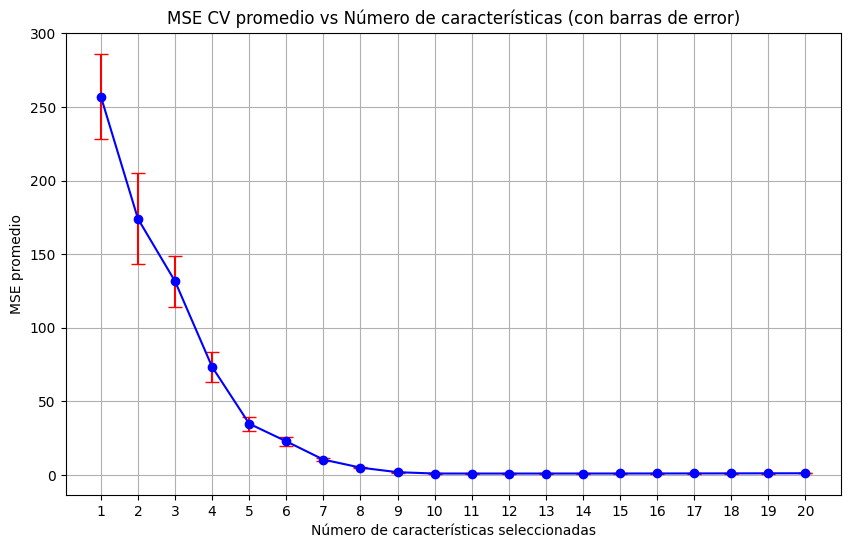

In [ ]:
df_results['num_features'] = df_results['feature_idx'].apply(len)
df_results['mse'] = -df_results['avg_score']
num_folds = 10
df_results['std_dev'] = df_results['cv_scores'].apply(lambda x: np.std(x))
df_results['stderr'] = df_results['std_dev'] / np.sqrt(num_folds)

plt.figure(figsize=(10, 6))
plt.errorbar(df_results['num_features'], df_results['mse'], yerr=df_results['stderr'], fmt='o-', color='b', ecolor='r', capsize=5)
plt.title('MSE CV promedio vs Número de características (con barras de error)')
plt.xlabel('Número de características seleccionadas')
plt.xticks(range(1, X.shape[1] + 1))
plt.ylabel('MSE promedio')
plt.grid(True)
plt.show()

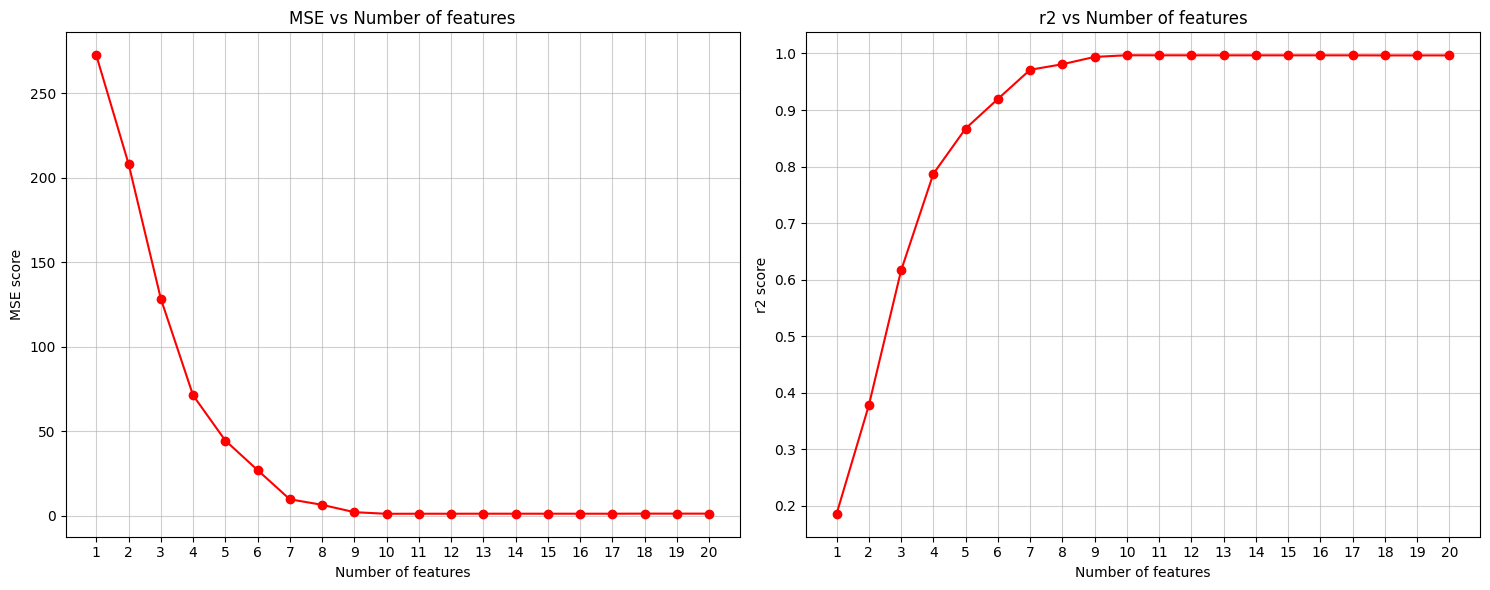

In [ ]:
#10.D
score_mse = []
score_r2 = []
models = []
for n in range(1, X.shape[1] + 1):
    features_selected = list(df_results['feature_idx'].loc[df_results.index == n].values[0])
    X_train_selected = X_train[:, features_selected]
    X_test_selected = X_test[:, features_selected]
    lr = LinearRegression()
    model = lr.fit(X_train_selected, y_train)
    models.append(model)
    model_pred = model.predict(X_test_selected)
    r2 = r2_score(y_test, model_pred)
    score_r2.append(r2)
    mse = mean_squared_error(y_test, model_pred)
    score_mse.append(mse)


fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].plot(range(1, X.shape[1] + 1), score_mse, marker = 'o', c = 'r')
ax[0].set_title('MSE vs Number of features')
ax[0].set_xlabel('Number of features')
ax[0].set_xticks(ticks = range(1, X.shape[1] + 1))
ax[0].set_ylabel('MSE score')
ax[0].grid(alpha = 0.6)

ax[1].plot(range(1, X.shape[1] + 1), score_r2, marker = 'o', c = 'r')
ax[1].set_title('r2 vs Number of features')
ax[1].set_xlabel('Number of features')
ax[1].set_xticks(ticks = range(1, X.shape[1] + 1))
ax[1].set_ylabel('r2 score')
ax[1].grid(alpha = 0.6)
fig.tight_layout()
fig.show()


In [ ]:
#10.E
features = list(df_results['feature_idx'].loc[df_results.index == 10])
winner = models[9]

print(features, winner.coef_.flatten())

print(list(betas.flatten()))





[(0, 4, 6, 7, 10, 12, 13, 14, 15, 19)] [ 3.87925101  7.93057152  8.02604281 -4.99025131  0.93399574  3.95374909
  8.9353111  -2.08675028  1.92424607  8.03542932]
[4.0, 0.0, 0.0, 0.0, 8.0, 0.0, 8.0, -5.0, 0.0, 0.0, 1.0, 0.0, 4.0, 9.0, -2.0, 2.0, 0.0, 0.0, 0.0, 8.0]
